# Определение перспективного тарифа для телеком-компании

Цель проекта - определить какой тарифный план - "Смарт" или "Ультра" - приносит больше прибыли.</b></font><br>

В данном исследовании проверим гипотезы:

*   H0:Средняя выручка по трифам "Смарт" и "Ультра" равны.</b></font><br>
    H1: Средние значения выручки  "Смарт" и "Ультра" не равны.
    
    
*   H0: средняя выручка от пользователей из Москвы и других регионов равны.</b></font><br>
    H1: средняя выручка от пользователей из Москвы не равна выручке от пользователе из других регионов.

## Изучение данных из файла

In [1]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from functools import reduce

In [2]:
users = pd.read_csv(r'C:\Users\ANN\Downloads/users.csv')    
calls = pd.read_csv(r'C:\Users\ANN\Downloads/calls.csv')    
internet = pd.read_csv(r'C:\Users\ANN\Downloads/internet.csv', index_col=0)    
messages = pd.read_csv(r'C:\Users\ANN\Downloads/messages.csv')    
tariffs = pd.read_csv(r'C:\Users\ANN\Downloads/tariffs.csv')

Выведем на экран датафрей users.
С помощью метода info() получим информацию о названиях колонок, количестве строк. </b></font><br>В таблице - 8 столбцов, тип данных - int и object. </b></font><br> В столбце churn_date есть пропущенные значения - это занчит, что тариф ещё действовал на момент выгрузки данных.

In [3]:
users.head(5)         

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Согласно документации к данным: </b></font><br>

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Выведем на экран датафрей calls.</b></font><br> 
С помощью метода info() получим информацию о названиях колонок, количестве строк. </b></font><br>В таблице - 4 столбца, тип данных - float, int и object. Пропущенных значений нет.

In [5]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Согласно документации к данным: </b></font><br>

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Выведем на экран датафрей internet.</b></font><br> 
С помощью метода info() получим информацию о названиях колонок, количестве строк. </b></font><br>В таблице - 5 столбцов, тип данных - float, int и object. Пропущенных значений нет. Столбец Unnamed: дублирует нумерацию строк, на этапе предобработки можем исключить его из датафрейма.

In [7]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Согласно документации к данным: </b></font><br>
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Выведем на экран датафрей messages.</b></font><br> 
С помощью метода info() получим информацию о названиях колонок, количестве строк. </b></font><br>В таблице - 3 столбца, тип данных - int и object. Пропущенных значений нет. 

In [9]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Согласно документации к данным: </b></font><br>
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Выведем на экран датафрей tariffs.</b></font><br> 
С помощью метода info() получим информацию о названиях колонок, количестве строк. 

In [11]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то  со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

В датафреймах нет пропущенных значений. На этапе предобработки поменяем типы данных для дальнейшей работы.

## Предобработка данных

С помощью функции pd.to_datetime изменим тип данных в столбце churn_date на datetime.

In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'])  
users['churn_date']

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
495          NaT
496          NaT
497          NaT
498   2018-10-25
499          NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

С помощью функции pd.to_datetime изменим тип данных в столбце reg_date на datetime.

In [14]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['reg_date']

0     2018-05-25
1     2018-11-01
2     2018-06-17
3     2018-08-17
4     2018-05-14
         ...    
495   2018-08-28
496   2018-01-27
497   2018-10-09
498   2018-07-19
499   2018-09-27
Name: reg_date, Length: 500, dtype: datetime64[ns]

С помощью функции pd.to_datetime изменим тип данных в столбце calls на datetime.

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_month'] = calls['call_date'].dt.month
calls['call_month']

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: call_month, Length: 202607, dtype: int64

С помощью функции pd.to_datetime изменим тип данных в столбце session_date на datetime и изменим формат даты, вместо числа, месяца и года укажем номер месяца (1 -январь, 12-декабрь).

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'])  
internet['session_month'] = internet['session_date'].dt.month
internet['session_month']

0         11
1          9
2          6
3          8
4          9
          ..
149391    10
149392    12
149393    10
149394    11
149395    10
Name: session_month, Length: 149396, dtype: int64

С помощью функции pd.to_datetime изменим тип данных в столбце message_date на datetime и изменим формат даты, вместо числа, месяца и года укажем номер месяца (1 -январь, 12-декабрь).

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])  
messages['message_month'] = messages['message_date'].dt.month
messages['message_month']

0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: message_month, Length: 123036, dtype: int64

Данны вывели через internet = pd.read_csv('/datasets/internet.csv',  index_col=0). Проверим результат.

In [18]:
internet.head(2)

,id,mb_used,session_date,user_id,session_month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9


Создадим столбец gb_per_month_included, переведем мегабайты в гигабайты. 1Гб = 1024 Мб. Проверим результат.

In [19]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs['gb_per_month_included']

0    15.0
1    30.0
Name: gb_per_month_included, dtype: float64

Округлим значения в столбце calls. Проверим результат.

In [20]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам. Проверим результат.

In [21]:
messages_pivot = messages.pivot_table(index=['user_id', 'message_month'],
    values = 'id', aggfunc='count').reset_index()
messages_pivot.columns=['user_id', 'month', 'message_quontity']
messages_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           2717 non-null   int64
 1   month             2717 non-null   int64
 2   message_quontity  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


Посчитаем для каждого пользователя посчитаем длительностьи количество звонков месяцам (столбец calls_quontity и calls_duration). Проверим результат.

In [22]:
calls_pivot = calls.pivot_table (index = ('user_id', 'call_month'),
                                 values = 'duration',
                                 aggfunc = ('count', 'sum')).reset_index()
calls_pivot.columns=['user_id', 'month', 'calls_quontity', 'duration']
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3174 non-null   int64  
 1   month           3174 non-null   int64  
 2   calls_quontity  3174 non-null   int64  
 3   duration        3174 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам (столбец gb_used). Проверим результат.

In [23]:
internet_pivot = internet.pivot_table(index=['user_id', 'session_month'],
    values = 'mb_used', aggfunc='sum').reset_index()
internet_pivot.columns=['user_id', 'month', 'gb_used']
internet_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   gb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


Округлим мегабайты до гигибайт.

In [24]:
internet_pivot['gb_used'] = internet['mb_used'] / 1024
internet_pivot['gb_used'] = internet_pivot['gb_used'].apply(np.ceil)
internet_pivot.head(5)

,user_id,month,gb_used
0,1000,5,1.0
1,1000,6,2.0
2,1000,7,2.0
3,1000,8,1.0
4,1000,9,1.0


Соединим датафреймы users, messages_pivot, calls_pivot и internet_pivot в один датафрейм - final_data с помощью метода merge(), удалим лишние столбцы с номерами месяцев. Проверим результат.

In [25]:
merge_data = pd.merge(users, messages_pivot, on=['user_id'], how='outer')
data_frames = [merge_data, calls_pivot, internet_pivot]
final_data = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)
final_data 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,message_quontity,calls_quontity,duration,gb_used
0,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,22.0,159.0,1.0
1,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,60.0,43.0,172.0,2.0
2,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,75.0,47.0,340.0,2.0
3,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,81.0,52.0,408.0,1.0
4,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,57.0,58.0,466.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,9.0,NaN,66.0,501.0,1.0
3284,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,10.0,NaN,52.0,354.0,0.0
3285,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,11.0,NaN,63.0,411.0,1.0
3286,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,12.0,NaN,62.0,418.0,1.0


С помощью метода info() проверим данный о таблице. Значения в столбцах различются, значит в данных есть пропуски.

In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 0 to 3287
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3288 non-null   int64         
 1   age               2791 non-null   float64       
 2   churn_date        149 non-null    datetime64[ns]
 3   city              2791 non-null   object        
 4   first_name        2791 non-null   object        
 5   last_name         2791 non-null   object        
 6   reg_date          2791 non-null   datetime64[ns]
 7   tariff            2791 non-null   object        
 8   month             3214 non-null   float64       
 9   message_quontity  2717 non-null   float64       
 10  calls_quontity    3174 non-null   float64       
 11  duration          3174 non-null   float64       
 12  gb_used           3203 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(4)
memory usage: 359.6+ KB


С помощью методов isna() и sum() проверим количество пропусков.</b></font><br> Возможно есть пользователи, которые подключили тарифный план, но не воспользовались услугами или пользовались интернетом, но не делали звонков.

In [27]:
final_data.isna().sum()

user_id                0
age                  497
churn_date          3139
city                 497
first_name           497
last_name            497
reg_date             497
tariff               497
month                 74
message_quontity     571
calls_quontity       114
duration             114
gb_used               85
dtype: int64

С помощью метода len() и unique() проверим получилось ли перенести все данные из таблицы users. </b></font><br> Число пользователей не изменилось.

In [28]:
len(final_data['user_id'].unique())

500

С помощью функции count_overrun посчитаем прибыли по каждому месяцу. Если перерасхода по пакету услуг не было, то будет засчитана абонентская плата (если был, то абонентская плата + перерасход). </b></font><br>Проверим результат, выведем столбец revenue на экран.

In [29]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [30]:
def count_overrun(row):
    messages_overrun = 0
    minutes_overrun = 0
    gb_overrun = 0
    smart_monthly_pay = 550
    ultra_monthly_pay = 1950
    
    if row['tariff'] == 'ultra':
        if (row['message_quontity'] - 1000)>0:     
            messages_overrun = (row['message_id'] - 1000)*1
        else:
            messages_overrun = 0
        if (row['duration']-3000)>0:     
            minutes_overrun = (row['message_quontity'] - 3000)*1
        else:
            minutes_overrun = 0    
        if (row['gb_used']-30)>0: 
            gb_overrun = (row['gb_used'] - 30)*150
        else:
            gb_overrun = 0    
        return ultra_monthly_pay + messages_overrun + minutes_overrun + gb_overrun
    
    if (row['tariff'] == 'smart'):
        if (row['message_quontity'] - 50)>0:     
            messages_overrun = (row['message_quontity'] - 50)*3
        else:
            messages_overrun = 0
        if (row['duration']-500)>0:     
            minutes_overrun = (row['duration'] - 500)*3
        else:
            minutes_overrun = 0    
        if (row['gb_used']-15)>0: 
            gb_overrun = (row['gb_used'] - 15)*200
        else:
            gb_overrun = 0                         
        return smart_monthly_pay + messages_overrun + minutes_overrun + gb_overrun  

final_data['revenue'] = final_data.apply(count_overrun, axis=1)
final_data['revenue']

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3283       NaN
3284       NaN
3285       NaN
3286       NaN
3287       NaN
Name: revenue, Length: 3288, dtype: float64

Выведем последние десять строк датафрейма  final_data на экран.

In [31]:
 final_data.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,message_quontity,calls_quontity,duration,gb_used,revenue
3278,1479,NaN,NaT,NaN,NaN,NaN,NaT,NaN,9.0,NaN,98.0,799.0,0.0,NaN
3279,1479,NaN,NaT,NaN,NaN,NaN,NaT,NaN,10.0,NaN,83.0,640.0,1.0,NaN
3280,1479,NaN,NaT,NaN,NaN,NaN,NaT,NaN,11.0,NaN,79.0,465.0,1.0,NaN
3281,1479,NaN,NaT,NaN,NaN,NaN,NaT,NaN,12.0,NaN,81.0,576.0,1.0,NaN
3282,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,8.0,NaN,32.0,262.0,1.0,NaN
3283,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,9.0,NaN,66.0,501.0,1.0,NaN
3284,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,10.0,NaN,52.0,354.0,0.0,NaN
3285,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,11.0,NaN,63.0,411.0,1.0,NaN
3286,1494,NaN,NaT,NaN,NaN,NaN,NaT,NaN,12.0,NaN,62.0,418.0,1.0,NaN
3287,1476,NaN,NaT,NaN,NaN,NaN,NaT,NaN,4.0,NaN,NaN,NaN,1.0,NaN


## Aнализ данных

Создадим таблицу с данными по пользователям, которые подключены к тарифу "Ультра". Выведем ее на экран.

In [32]:
final_data_ultra = final_data[final_data['tariff'] == 'ultra']
final_data_ultra.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,message_quontity,calls_quontity,duration,gb_used,revenue
0,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,22.0,159.0,1.0,1950.0
1,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,60.0,43.0,172.0,2.0,1950.0
2,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,75.0,47.0,340.0,2.0,1950.0
3,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,81.0,52.0,408.0,1.0,1950.0
4,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,57.0,58.0,466.0,1.0,1950.0
5,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,73.0,57.0,350.0,1.0,1950.0
6,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,58.0,43.0,338.0,1.0,1950.0
7,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,70.0,46.0,333.0,1.0,1950.0
16,1003,23.0,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8.0,37.0,55.0,380.0,1.0,1950.0
17,1003,23.0,NaT,Москва,Белла,Белякова,2018-08-17,ultra,9.0,91.0,134.0,961.0,1.0,1950.0


С помощью метода plot() построим гистограмму и проверим, как распределяются значения в столбеце message_quontity.
С помощью describe() получим статистику по данному столбцу. </b></font><br>
В среднем пользователи отправляют около 57 сообщений в месяц, стандартное отклоненение составляет 42.</b></font><br>
Среднее значение не превышает количество сообщений в тарифе - 1000 смс.

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: message_quontity, dtype: float64

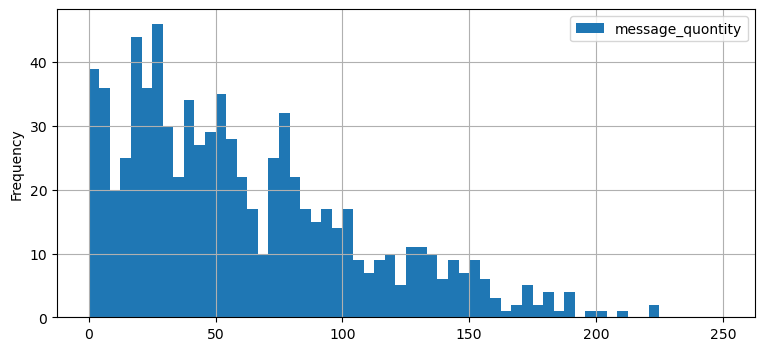

In [33]:
final_data_ultra.plot(y = 'message_quontity', kind = 'hist', bins = 60, grid=True, figsize = (9,4), range = (0,250))
final_data_ultra['message_quontity'].describe()

Можем проверить, правильно ли посчитали стандартное отколонение 45. Посчитаем дисперсию с помощью метода var().</b></font><br> Дисперсия составила 1817, квадратный корень из дисперсии - это стандартное отклонение составит 42. Стандартное отклонение посчитано верно.

In [34]:
np.var(final_data_ultra['message_quontity'])

2107.005523515688

In [35]:
final_data_ultra.pivot_table(index= 'tariff', values= 'message_quontity', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,message_quontity,message_quontity,message_quontity,message_quontity
tariff,,,,
ultra,61.161006,2109.659183,45.931026,51.0


С помощью метода plot() построим гистограмму и проверим, как распределяются значения в столбеце calls_duration.
С помощью describe() получим статистику по данному столбцу.  </b></font><br>
В среднем длительность звонков пользователей составляет 568 минут, стандартное отклоненение составляет 298. </b></font><br>
Среднее значение не превышает количество минут в тарифе - 3000 мин.

count     762.000000
mean      552.460630
std       312.274277
min         0.000000
25%       320.500000
50%       533.000000
75%       758.500000
max      1673.000000
Name: duration, dtype: float64

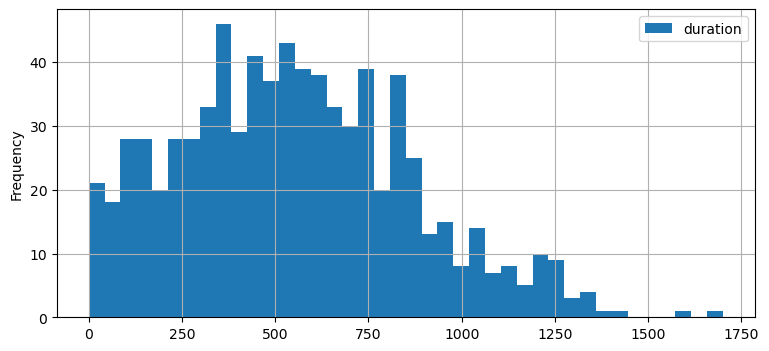

In [36]:
final_data_ultra.plot(y = 'duration', kind = 'hist', bins = 40, grid=True, figsize = (9,4), range = (0,1700))
final_data_ultra['duration'].describe()

С помощью метода plot() построим гистограмму и проверим, как распределяются значения в столбеце gb_used.
С помощью describe() получим статистику по данному столбцу.  </b></font><br>
В среднем пользователи используют 0,8 Гб в месяц, стандартное отклоненение составляет 0,3 Гб. </b></font><br>
Среднее значение не превышает количество минут в тарифе - 150 Гб.

count    785.000000
mean       0.857325
std        0.381358
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: gb_used, dtype: float64

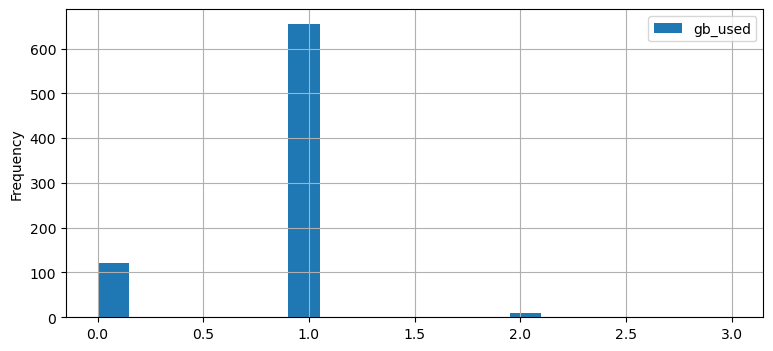

In [37]:
final_data_ultra.plot(y = 'gb_used', kind = 'hist', bins = 20, grid=True, figsize = (9,4), range = (0,3))
final_data_ultra['gb_used'].describe()

Создадим таблицу с данными по пользователям, которые подключены к тарифу "Смарт". Выведем ее на экран.

In [38]:
final_data_smart = final_data[final_data['tariff'] == 'smart']
final_data_smart.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,message_quontity,calls_quontity,duration,gb_used,revenue
8,1001,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,NaN,NaN,NaN,550.0
9,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.0,4.0,15.0,117.0,1.0,550.0
10,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,7.0,11.0,26.0,214.0,0.0,550.0
11,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,8.0,13.0,42.0,289.0,1.0,550.0
12,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,9.0,4.0,36.0,206.0,1.0,550.0
13,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,10.0,10.0,33.0,212.0,1.0,550.0
14,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,11.0,16.0,32.0,243.0,1.0,550.0
15,1002,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12.0,12.0,33.0,236.0,1.0,550.0
29,1005,67.0,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1.0,7.0,15.0,95.0,1.0,550.0
30,1005,67.0,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2.0,38.0,69.0,456.0,1.0,550.0


С помощью метода plot() построим гистограмму и проверим, как распределяются значения в столбеце message_quontity. С помощью describe() получим статистику по данному столбцу. </b></font><br>
В среднем пользователи отправляют около 39 сообщений в месяц, стандартное отклоненение составляет 25. </b></font><br>
Среднее значение не превышает количество сообщений в тарифе - 50 смс.

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: message_quontity, dtype: float64

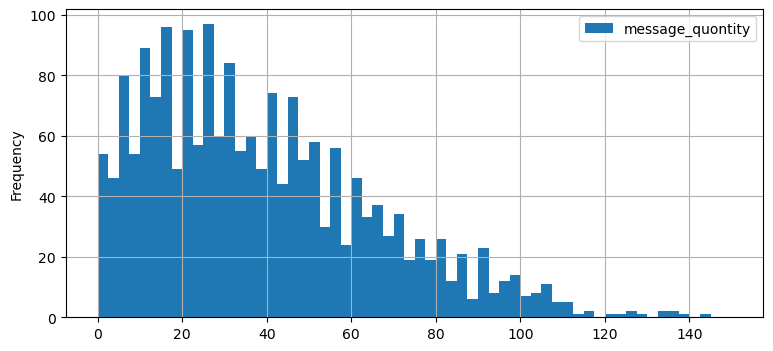

In [39]:
final_data_smart.plot(y = 'message_quontity', kind = 'hist', bins = 60, grid=True, figsize = (9,4), range = (0,150))
final_data_smart['message_quontity'].describe()

С помощью метода plot() построим гистограмму и проверим, как распределяются значения в столбеце calls_duration.
С помощью describe() получим статистику по данному столбцу.  </b></font><br>
В среднем длительность звонков пользователей составляет 417 минут, стандартное отклоненение составляет 183. </b></font><br>
Среднее значение не превышает количество минут в тарифе - 500 мин.

count    1916.000000
mean      420.841336
std       187.855127
min         0.000000
25%       287.000000
50%       427.000000
75%       547.000000
max      1435.000000
Name: duration, dtype: float64

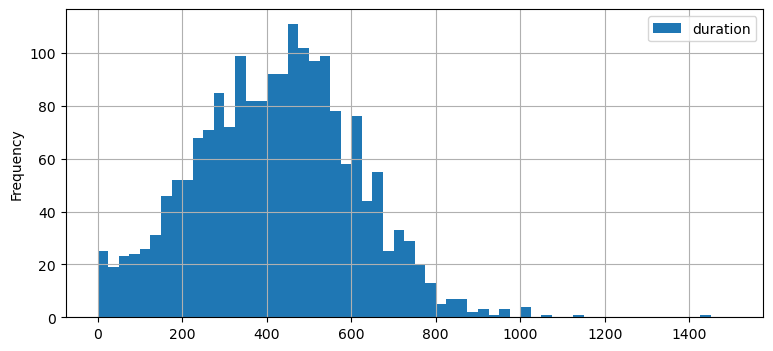

In [40]:
final_data_smart.plot(y = 'duration', kind = 'hist', bins = 60, grid=True, figsize = (9,4), range = (0,1500))
final_data_smart['duration'].describe()

С помощью метода plot() построим гистограмму и проверим, как распределяются значения в столбеце gb_used.
С помощью describe() получим статистику по данному столбцу.  </b></font><br>
В среднем пользователи используют 0,8 Гб в месяц, стандартное отклоненение составляет 0,3 Гб. </b></font><br>
Среднее значение превышает количество минут в тарифе - 15 Гб.

count    1921.000000
mean        0.864133
std         0.377449
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: gb_used, dtype: float64

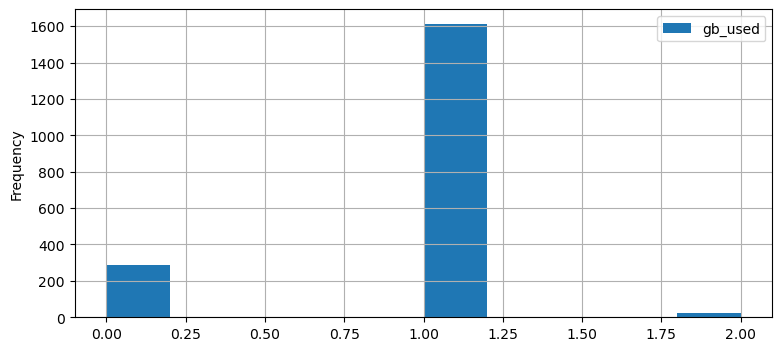

In [41]:
final_data_smart.plot(y = 'gb_used', kind = 'hist', bins = 10, grid=True, figsize = (9,4), range = (0,2))
final_data_smart['gb_used'].describe()

### Вывод

Пользователи тарифов "Смарт" и "Ультра" в среднем не превышают лимит в пакетах услуг. 

## Проверка гипотез

Проверим следующие гипотезы:
    
    H0: Средняя выручка по тарифам "Смарт" и "Ультра" равны.
    H1: Средние значения выручки  "Смарт" и "Ультра" не равны.

In [42]:
smart_revenue = final_data[final_data['tariff'] == 'smart']
ultra_revenue = final_data[final_data['tariff'] != 'ultra']

In [43]:
alpha = .05

results = st.ttest_ind(
    smart_revenue['revenue'], 
    ultra_revenue['revenue'], nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Проверка показала, что выручки по тарифам "Смарт" и "Ультра" равны.

Проверим следующие гипотезы:

    H0: средняя выручка от пользователей из Москвы и других регионов равны.
    H1: средняя выручка от пользователей из Москвы не равна выручке от пользователе из других регионов.

In [44]:
users_moscow = final_data[final_data['city'] == 'Москва']
users_regions = final_data[final_data['city'] != 'Москва']

In [45]:
alpha = .05

results = st.ttest_ind(
    users_moscow['revenue'], 
    users_regions['revenue'], nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.8842970411330044e-06
Отвергаем нулевую гипотезу


Проверка гипотез показала, что средняя выручка от пользователей из Москвы отличается от средней выручки от пользователей из регионов.

## Общий вывод:

Мы провели исследование двух тарифных планов "Смарт" и "Ультра". </font><br>
Выяснили, что пользователи тарифов в среднем не превышают лимиты по пакетам услуг.  </font><br>
Проверили гипотезы и выяснили, что средяя выручка по тарифу "Ультра" равна выручке по тарифу "Смарт", средняя выручка от пользователей Москвы не равна выручке от пользователей из других регионов.